In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix

In [130]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

### EDA and PREPROCESSING

In [131]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [132]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [133]:
train.shape

(614, 13)

In [134]:
test.shape

(367, 12)

In [135]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Looking for relations

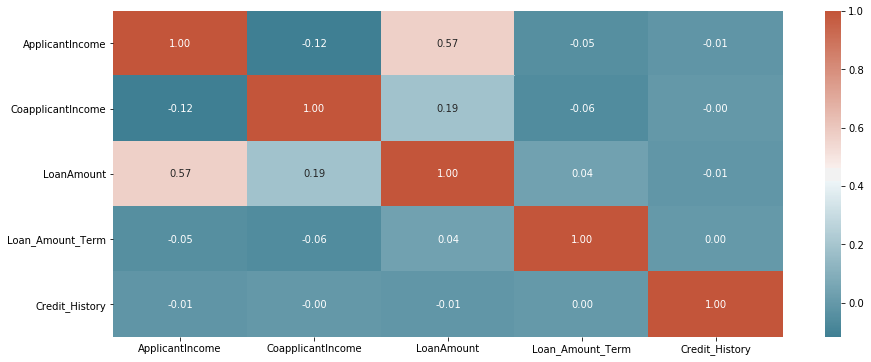

In [137]:
plt.figure(figsize = (15,6))
sns.heatmap(train.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True, fmt='.2f')

In [138]:
train['Loan_Status'] = train['Loan_Status'].map({'N' : 0, 'Y' : 1})

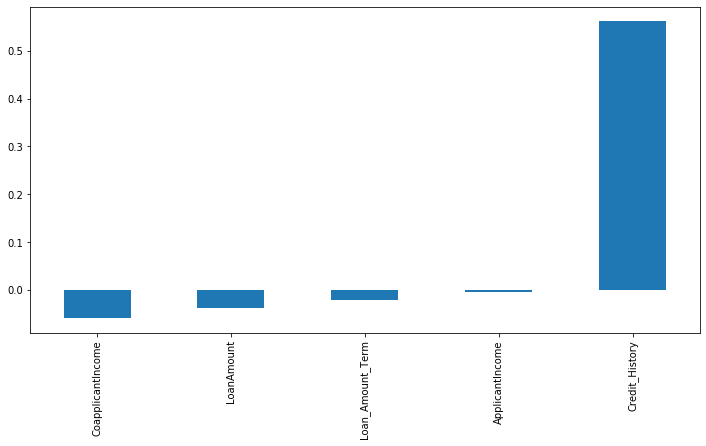

In [139]:
plt.figure(figsize = (12,6))
train.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar')

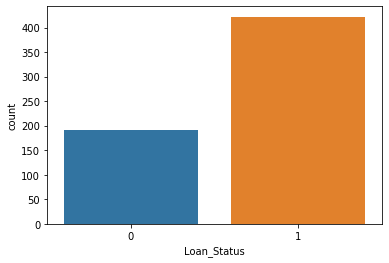

In [140]:
sns.countplot(train['Loan_Status'])

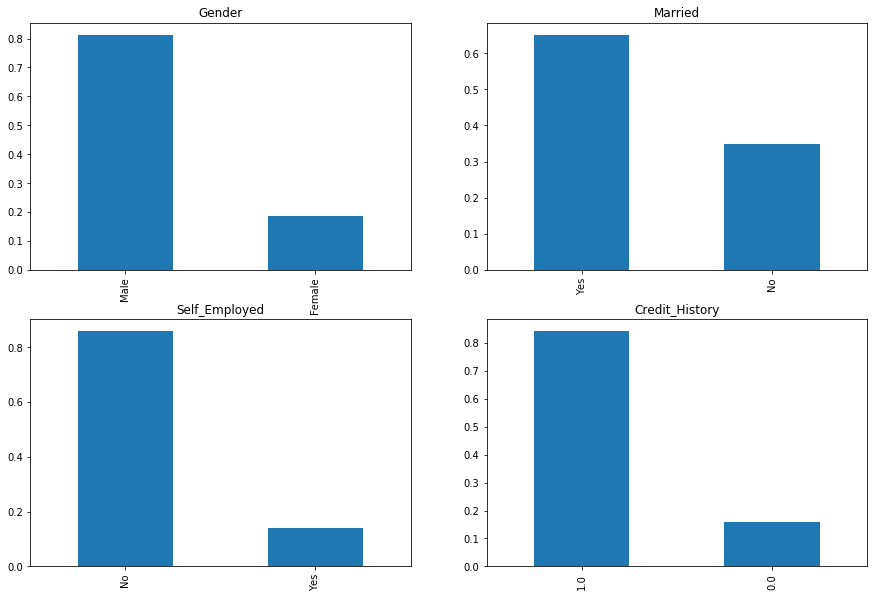

In [141]:
#categorical variables
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

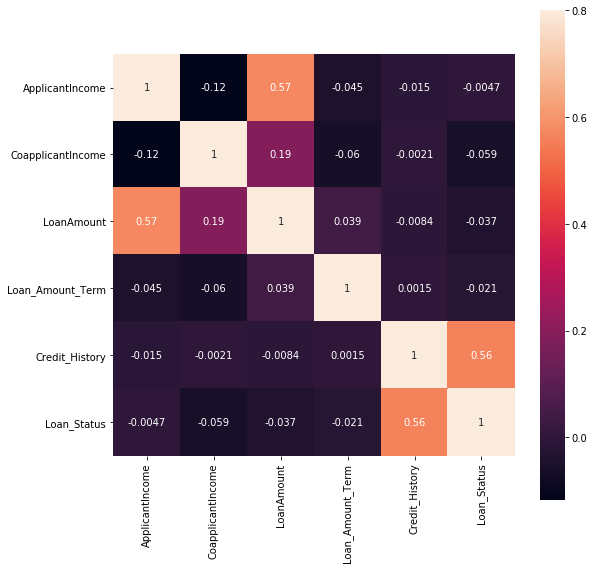

In [142]:
corrmat=train.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True)

In [143]:
train.Married=train.Married.map({'Yes':1,'No':0})
test.Married=test.Married.map({'Yes':1,'No':0})

In [144]:
test.Married.value_counts()

1    233
0    134
Name: Married, dtype: int64

In [145]:
train.Married.value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [146]:
train.Dependents=train.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
test.Dependents=test.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

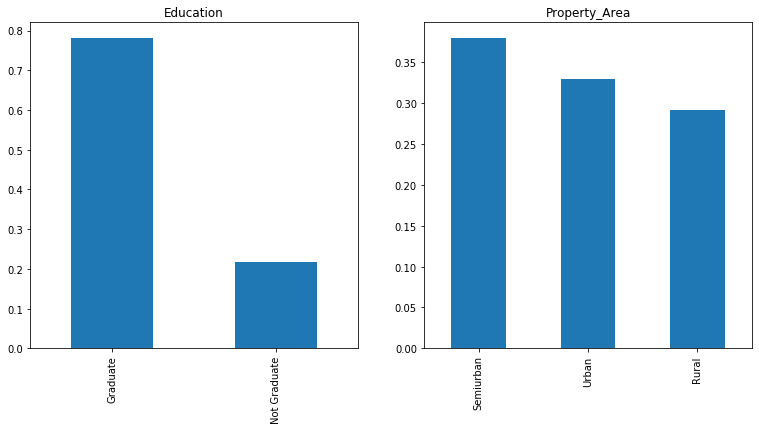

In [147]:
#independent variables
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

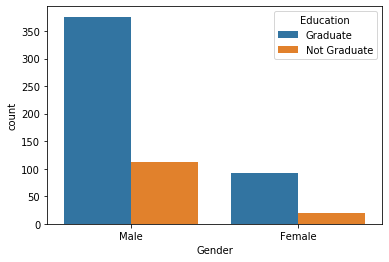

In [148]:
sns.countplot('Gender', hue = 'Education', data = train)

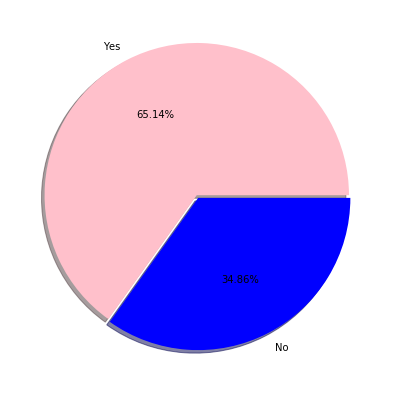

In [149]:
size = train['Married'].value_counts()
labels = ['Yes', 'No']
color = ['pink', 'blue']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

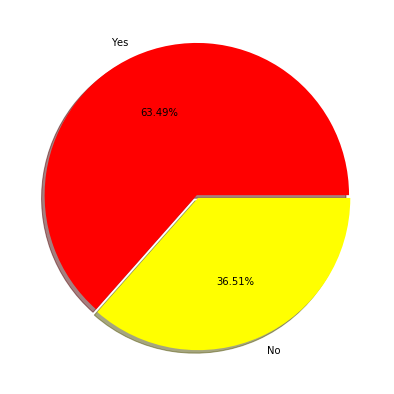

In [150]:
size = test['Married'].value_counts()
labels = ['Yes', 'No']
color = ['red', 'yellow']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

In [151]:
gender = train[['Gender', 'LoanAmount']].groupby("Gender").mean()
gender = pd.DataFrame(gender)
gender

,LoanAmount
Gender,
Female,126.697248
Male,149.265957


In [152]:
gender = test[['Gender', 'LoanAmount']].groupby("Gender").mean()
gender = pd.DataFrame(gender)
gender

,LoanAmount
Gender,
Female,126.797101
Male,139.031915


In [153]:
train.Self_Employed=train.Self_Employed.map({'Yes':1,'No':0})
test.Self_Employed=test.Self_Employed.map({'Yes':1,'No':0})
train.Education=train.Education.map({'Graduate':1,'Not Graduate':0})
test.Education=test.Education.map({'Graduate':1,'Not Graduate':0})
train.Married=train.Married.map({'Yes':1,'No':0})
test.Married=test.Married.map({'Yes':1,'No':0})
train.Gender=train.Gender.map({'Male':1,'Female':0})
test.Gender=test.Gender.map({'Male':1,'Femlae':0})

In [154]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,NaN,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,NaN,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,NaN,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,NaN,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,NaN,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


## Looking for null value and handling it

In [155]:
train.isnull().sum()

Loan_ID                0
Gender                13
Married              614
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [156]:
test.isnull().sum()

Loan_ID                0
Gender                81
Married              367
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
dtype: int64

In [157]:
train.Gender.fillna(np.random.randint(0,2),inplace=True)
train.Married.fillna(np.random.randint(0,2),inplace=True)
train.Education.fillna(np.random.randint(0,2),inplace=True)
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [158]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [159]:
test.Gender.fillna(np.random.randint(0,2),inplace=True)
test.Married.fillna(np.random.randint(0,2),inplace=True)
test.Education.fillna(np.random.randint(0,2),inplace=True)
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [160]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [161]:
# changing datatypes of certain cols
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [162]:
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')

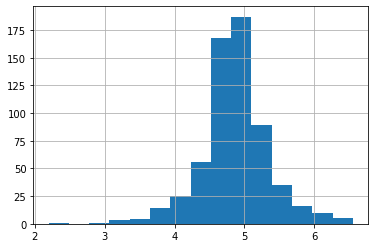

In [163]:
#checkng log transformaton
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=15) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [164]:
#scaling data
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '')
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')

scaler = StandardScaler()

train['Loan_ID'] = scaler.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scaler.transform(test['Loan_ID'].values.reshape(-1, 1))
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [165]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [166]:
for col in numerical_cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

####  Data into dependent and independent vrbl (splitting)

In [167]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
#X_test = test

### Model Building

In [168]:
#Logistic Regression
X = pd.get_dummies(X)
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [169]:
X_train, X_cval, y_train, y_cval = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [171]:
lr_pred_cv = model.predict(X_cval)

In [172]:
lr_accuracy = accuracy_score(y_cval,lr_pred_cv)
lr_accuracy

0.7837837837837838

In [173]:
lr_pred_test = model.predict(test)
lr_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [174]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [175]:
submission['Loan_Status']=lr_pred_test 
test_df = pd.read_csv('test_lAUu6dG.csv')
submission['Loan_ID']=test_df['Loan_ID']

In [176]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [177]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('submission_lr.csv')

#### stratified kfold cross validation

In [178]:
from sklearn.model_selection import StratifiedKFold
i=1
skfold_validator = StratifiedKFold(n_splits = 10)
for train_index,test_index in skfold_validator.split(X,y):
     print('n{} of kfold {}'.format(i,skfold_validator.n_splits))
     x_tr,x_vl = X.iloc[train_index],X.iloc[test_index]
     y_tr,y_vl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(x_tr, y_tr)
     pred_test = model.predict(x_vl)
     score = accuracy_score(y_vl,pred_test)
     print('accuracy_score',score)
     i+=1

n1 of kfold 10
accuracy_score 0.8064516129032258
n2 of kfold 10
accuracy_score 0.8225806451612904
n3 of kfold 10
accuracy_score 0.7419354838709677
n4 of kfold 10
accuracy_score 0.7580645161290323
n5 of kfold 10
accuracy_score 0.7868852459016393
n6 of kfold 10
accuracy_score 0.7868852459016393
n7 of kfold 10
accuracy_score 0.8688524590163934
n8 of kfold 10
accuracy_score 0.8524590163934426
n9 of kfold 10
accuracy_score 0.8032786885245902
n10 of kfold 10
accuracy_score 0.8360655737704918


In [179]:
skfold_result = cross_val_score(model,X,y, cv = skfold_validator)
skfold_result

array([0.80645161, 0.82258065, 0.74193548, 0.75806452, 0.78688525,
       0.78688525, 0.86885246, 0.85245902, 0.80327869, 0.83606557])

In [180]:
np.mean(skfold_result)

0.8063458487572712

In [181]:
skfold_pred_test = model.predict(test)

In [182]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_Status']=skfold_pred_test 
test_df = pd.read_csv('test_lAUu6dG.csv')
submission['Loan_ID']=test_df['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('submission_lr_skfold.csv')

#### Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a decision tree classifier
dt_model= DecisionTreeClassifier()

# Train the classifier on the training set
dt_model_fit = dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_cval)

# Evaluate the performance of the classifier using various metrics
print("Accuracy:", accuracy_score(y_cval, y_pred_dt))
print("Precision:", precision_score(y_cval, y_pred_dt))
print("Recall:", recall_score(y_cval, y_pred_dt))
print("F1 Score:", f1_score(y_cval, y_pred_dt))

Accuracy: 0.6756756756756757
Precision: 0.7459016393442623
Recall: 0.7583333333333333
F1 Score: 0.7520661157024793


In [184]:
scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-validation Scores: [0.72357724 0.66666667 0.70731707 0.7398374  0.48360656]
Average Accuracy: 0.6642009862721577


In [185]:
#tuning decision tree
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier with default hyperparameters
dt = DecisionTreeClassifier(random_state=1)

# Define the hyperparameters to tune
params = {'max_depth': [3, 4, 5, 6, 7],
          'min_samples_leaf': [10, 20, 30, 40, 50]}

# Perform grid search cross-validation to find the best set of hyperparameters
grid_search = GridSearchCV(dt, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the decision tree classifier on the training set with the best hyperparameters
dt = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                            min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                            random_state=1)
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_cval)

# Evaluate the performance of the classifier using various metrics
print("Accuracy:", accuracy_score(y_cval, y_pred_dt))
print("Precision:", precision_score(y_cval, y_pred_dt))
print("Recall:", recall_score(y_cval, y_pred_dt))
print("F1 Score:", f1_score(y_cval, y_pred_dt))

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 10}
Accuracy: 0.7837837837837838
Precision: 0.7564102564102564
Recall: 0.9833333333333333
F1 Score: 0.8550724637681159


In [186]:
dt_pred = dt.predict(test)

In [187]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_Status']=dt_pred 
test_df = pd.read_csv('test_lAUu6dG.csv')
submission['Loan_ID']=test_df['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('submission_decisionTree.csv')

### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    rf_model = RandomForestClassifier(random_state=1, max_depth=10)     
    rf_m_f = rf_model.fit(xtr, ytr) 
    rf_pred_test = rf_model.predict(xvl) 
    score = accuracy_score(yvl,rf_pred_test) 
    print('accuracy_score',score) 
    i+=1 
rf_pred_test = rf_model.predict(test)

n1 of kfold 5
accuracy_score 0.8211382113821138
n2 of kfold 5
accuracy_score 0.8292682926829268
n3 of kfold 5
accuracy_score 0.8048780487804879
n4 of kfold 5
accuracy_score 0.8048780487804879
n5 of kfold 5
accuracy_score 0.7868852459016393


In [189]:
print("Average Accuracy:", score.mean())

Average Accuracy: 0.7868852459016393


In [190]:
rf_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [191]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")


In [192]:
submission['Loan_Status']=rf_pred_test 
test_df = pd.read_csv('test_lAUu6dG.csv')
submission['Loan_ID']=test_df['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('submission_randomforest.csv')